In [103]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline
pd.options.display.float_format = "{:,.2f}".format
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
params = {'axes.labelsize': 12,
         'axes.titlesize':15,
         'xtick.labelsize':12,
         'ytick.labelsize':12,
         "figure.figsize" :(10,6)}
plt.rcParams.update(params)

In [27]:
# load boston housing dataset from sklearn
data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
# grab features X and target y
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["MEDV"])

print(X.head())
print(y.head())

   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0  0.01 18.00   2.31  0.00 0.54 6.58 65.20 4.09 1.00 296.00    15.30 396.90   
1  0.03  0.00   7.07  0.00 0.47 6.42 78.90 4.97 2.00 242.00    17.80 396.90   
2  0.03  0.00   7.07  0.00 0.47 7.18 61.10 4.97 2.00 242.00    17.80 392.83   
3  0.03  0.00   2.18  0.00 0.46 7.00 45.80 6.06 3.00 222.00    18.70 394.63   
4  0.07  0.00   2.18  0.00 0.46 7.15 54.20 6.06 3.00 222.00    18.70 396.90   

   LSTAT  
0   4.98  
1   9.14  
2   4.03  
3   2.94  
4   5.33  
   MEDV
0 24.00
1 21.60
2 34.70
3 33.40
4 36.20


In [28]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


In [34]:
# combine X and y
df = pd.concat([X, y], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


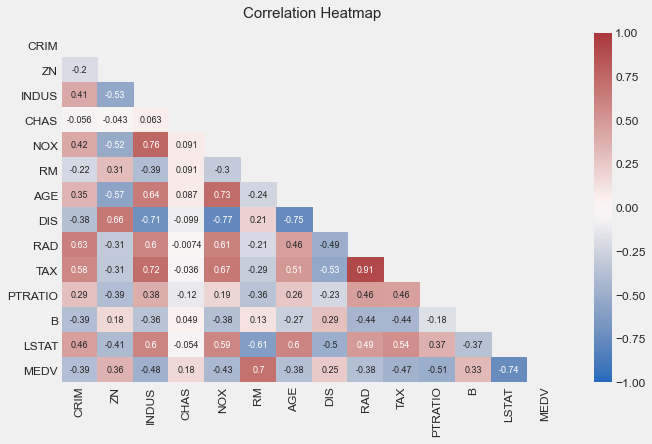

In [67]:
# define mask
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# generate correlation map for each features and the target
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='vlag', annot_kws={"fontsize":9})
heatmap.set_title("Correlation Heatmap", fontdict={'fontsize':15}, pad=15);

In [70]:
# hyperparameter config
RANDOM_SEED = 0
TEST_SIZE = 0.3

In [71]:
# split dataset in to train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
y_pred = model.predict(X_test)

In [81]:
def model_eval(actual, pred):
    """Evaluate linear regression model based on R2, mean absolute error and mean squared error"""
    R2_score = r2_score(actual, pred)
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)

    print("Model performance metrics: ")
    print("--------------------------")
    print(f"R-squared:               {R2_score}")
    print(f"Mean Absolute Error:     {mae}")
    print(f"Mean Squared Error:      {mse}")
    print(f"Root Mean Squared Error: {rmse}")

In [82]:
model_eval(y_test, y_pred)

Model performance metrics: 
--------------------------
R-squared:               0.6733825506400171
Mean Absolute Error:     3.6099040603818096
Mean Squared Error:      27.195965766883408
Root Mean Squared Error: 5.214975145375423


In [83]:
model_eval(y_train, model.predict(X_train))

Model performance metrics: 
--------------------------
R-squared:               0.7645451026942549
Mean Absolute Error:     3.103606103908007
Mean Squared Error:      19.958219814238042
Root Mean Squared Error: 4.4674623461466405


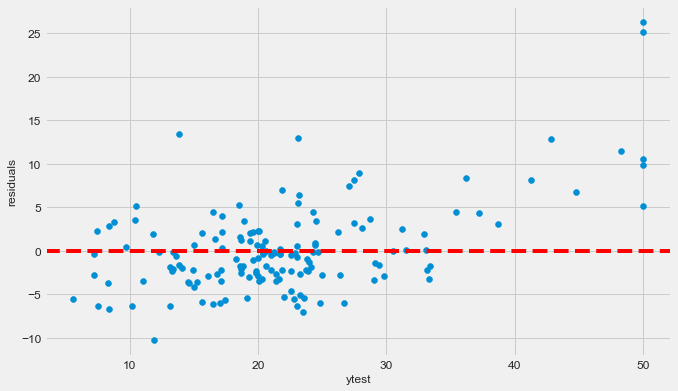

In [109]:
# plot residuals
residuals = y_test - y_pred 

plt.scatter(x=y_test, y=residuals)
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.xlabel("ytest")
plt.ylabel("residuals")
plt.show()

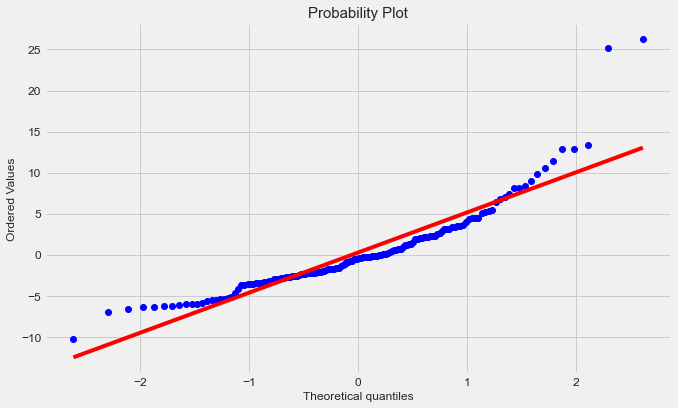

In [116]:
stats.probplot(residuals["MEDV"], dist ="norm", plot=plt);

In [134]:
# order coefficients
coef_df = pd.DataFrame(model.coef_.T, index=X_train.columns, columns=["Coefficient"])
coef_df.sort_values(by=["Coefficient"], ascending=False)

,Coefficient
RM,3.86
CHAS,2.51
RAD,0.24
ZN,0.04
INDUS,0.01
B,0.01
AGE,-0.01
TAX,-0.01
CRIM,-0.12
LSTAT,-0.49
